<img src="../images/UBRA_Logo_DATA_TRAIN.png" style="width: 800px;">

In [70]:
import xarray as xr
import matplotlib.pylab as plt
import numpy as np
from matplotlib import cm
# xr.set_options(display_style="text") #uncomment if you can't display html 

### Disecting the filenames

Every CMIP6 data file follow naming convention, that makes it easier to identify what we are dealing with even without looking inside netCDf attributes:

**tas_Amon_MPI-ESM1-2-LR_historical_r1i1p1f1_gn_201001-201412.nc**

- **tas** : name of the variable. One can look them up in [CMIP tables](https://github.com/PCMDI/cmip6-cmor-tables/tree/master/Tables).
- **Amon** : Mip table, basically saying what we save and with what frequiency. In this case it's Atmosphereric fields with monthly resolutions. [Complete list](http://clipc-services.ceda.ac.uk/dreq/index/miptable.html)
- **MPI-ESM1-2-LR** : model (source) name. More details about each models is in [this table](https://github.com/WCRP-CMIP/CMIP6_CVs/blob/master/CMIP6_source_id.json).
- **historical** : experiment. [Info about experiments](https://github.com/WCRP-CMIP/CMIP6_CVs/blob/master/CMIP6_experiment_id.json)
- **r1i1p1f1** : "variabts" or ensemble members. The coding represents realization_index, initialization_index, physics_index, and forcing_index 
- **gn** variant of the grid. In this case native grid is used.
- **201001-201412** : time period

## Atmospheric data

### Looking at the data

We want to open two files at once

In [2]:
as_hist = xr.open_mfdataset("../data/tas_Amon_MPI-ESM1-2-LR_historical_r1i1p1f1*")

In [3]:
as_hist

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 96, lon: 192, time: 300)
Coordinates:
    height     float64 2.0
  * lon        (lon) float64 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
  * lat        (lat) float64 -88.57 -86.72 -84.86 -83.0 ... 84.86 86.72 88.57
  * time       (time) datetime64[ns] 1990-01-16T12:00:00 ... 2014-12-16T12:00:00
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(240, 2), meta=np.ndarray>
    lat_bnds   (time, lat, bnds) float64 dask.array<chunksize=(240, 96, 2), meta=np.ndarray>
    lon_bnds   (time, lon, bnds) float64 dask.array<chunksize=(240, 192, 2), meta=np.ndarray>
    tas        (time, lat, lon) float32 dask.array<chunksize=(240, 96, 192), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    contact:                cmip6-mpi-esm@dkrz.de
    creation_date:          2019-09-04T15:26:51Z
    data_specs_version:     01.00.30
    experiment:             all-forcing simulation of the recent past
    experiment_id:          historical
    external_variables:     areacella
    forcing_index:          1
    frequency:              mon
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.MPI-M.MPI-ES...
    grid:                   gn
    grid_label:             gn
    history:                2019-09-04T15:26:51Z ; CMOR rewrote data to be co...
    initialization_index:   1
    institution:            Max Planck Institute for Meteorology, Hamburg 201...
    institution_id:         MPI-M
    mip_era:                CMIP6
    nominal_resolution:     250 km
    parent_activity_id:     CMIP
    parent_experiment_id:   piControl
    parent_mip_era:         CMIP6
    parent_source_id:       MPI-ESM1-2-LR
    parent_time_units:      days since 1850-1-1 00:00:00
    parent_variant_label:   r1i1p1f1
    physics_index:          1
    product:                model-output
    project_id:             CMIP6
    realization_index:      1
    realm:                  atmos
    references:             MPI-ESM: Mauritsen, T. et al. (2019), Development...
    source:                 MPI-ESM1.2-LR (2017): \naerosol: none, prescribed...
    source_id:              MPI-ESM1-2-LR
    source_type:            AOGCM
    sub_experiment:         none
    sub_experiment_id:      none
    table_id:               Amon
    table_info:             Creation Date:(09 May 2019) MD5:e6ef8ececc8f33864...
    title:                  MPI-ESM1-2-LR output prepared for CMIP6
    variable_id:            tas
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by MPI-M is licensed un...
    cmor_version:           3.5.0
    tracking_id:            hdl:21.14100/49df5bf4-b1de-4efd-a8c7-960ebc0ef7e0

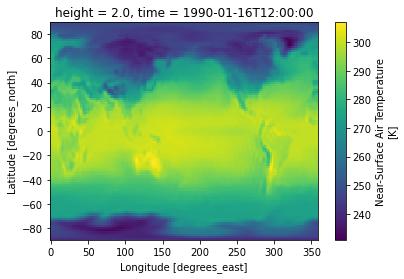

In [4]:
as_hist.tas[0,:,:].plot()

In [5]:
as_hist.tas.sel(time=slice('1990','2009'))

<xarray.DataArray 'tas' (time: 240, lat: 96, lon: 192)>
dask.array<getitem, shape=(240, 96, 192), dtype=float32, chunksize=(240, 96, 192), chunktype=numpy.ndarray>
Coordinates:
    height   float64 2.0
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * lat      (lat) float64 -88.57 -86.72 -84.86 -83.0 ... 83.0 84.86 86.72 88.57
  * time     (time) datetime64[ns] 1990-01-16T12:00:00 ... 2009-12-16T12:00:00
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    comment:        near-surface (usually, 2 meter) air temperature
    units:          K
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-09-04T15:26:51Z altered by CMOR: Treated scalar dime...

In [6]:
mean_hist = as_hist.tas.sel(time=slice('1990','2009')).mean(dim='time')

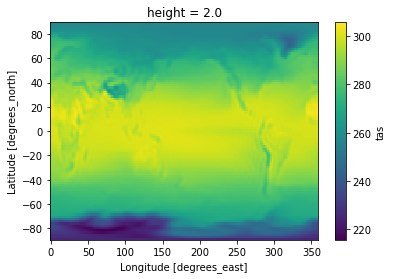

In [7]:
mean_hist.plot()

In [9]:
as_scenario = xr.open_dataset("../data/tas_Amon_MPI-ESM1-2-LR_ssp370_r1i1p1f1_gn_207501-209412.nc")

In [10]:
as_scenario

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 96, lon: 192, time: 240)
Coordinates:
  * time       (time) datetime64[ns] 2075-01-16T12:00:00 ... 2094-12-16T12:00:00
  * lat        (lat) float64 -88.57 -86.72 -84.86 -83.0 ... 84.86 86.72 88.57
  * lon        (lon) float64 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
    height     float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    tas        (time, lat, lon) float32 ...
Attributes:
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP AerChemMIP
    branch_method:          standard
    branch_time_in_child:   60265.0
    branch_time_in_parent:  60265.0
    contact:                cmip6-mpi-esm@dkrz.de
    creation_date:          2019-11-04T13:23:00Z
    data_specs_version:     01.00.30
    experiment:             gap-filling scenario reaching 7.0 based on SSP3
    experiment_id:          ssp370
    external_variables:     areacella
    forcing_index:          1
    frequency:              mon
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.MPI-M.MPI-ES...
    grid:                   gn
    grid_label:             gn
    history:                2019-11-04T13:23:00Z ; CMOR rewrote data to be co...
    initialization_index:   1
    institution:            Max Planck Institute for Meteorology, Hamburg 201...
    institution_id:         MPI-M
    mip_era:                CMIP6
    nominal_resolution:     250 km
    parent_activity_id:     CMIP
    parent_experiment_id:   historical
    parent_mip_era:         CMIP6
    parent_source_id:       MPI-ESM1-2-LR
    parent_time_units:      days since 1850-1-1 00:00:00
    parent_variant_label:   r1i1p1f1
    physics_index:          1
    product:                model-output
    project_id:             CMIP6
    realization_index:      1
    realm:                  atmos
    references:             MPI-ESM: Mauritsen, T. et al. (2019), Development...
    source:                 MPI-ESM1.2-LR (2017): \naerosol: none, prescribed...
    source_id:              MPI-ESM1-2-LR
    source_type:            AOGCM
    sub_experiment:         none
    sub_experiment_id:      none
    table_id:               Amon
    table_info:             Creation Date:(09 May 2019) MD5:e6ef8ececc8f33864...
    title:                  MPI-ESM1-2-LR output prepared for CMIP6
    variable_id:            tas
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by MPI-M is licensed un...
    cmor_version:           3.5.0
    tracking_id:            hdl:21.14100/5c7e4771-d7b7-44da-9a38-7f850259e346

In [11]:
mean_scenario = as_scenario.tas.sel(time=slice('2075','2094')).mean(dim='time')

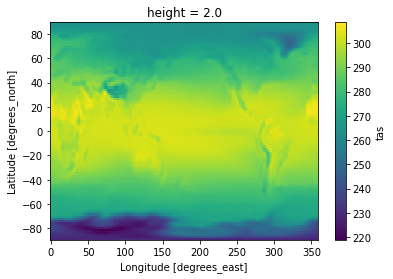

In [12]:
mean_scenario.plot()

In [13]:
difference = mean_scenario - mean_hist

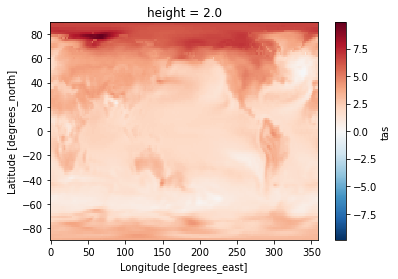

In [14]:
difference.plot()

## Exersise

- Plot map of the difference globally
- Plot map the the diferences for some region your interested in.

## Means

Let's compute the mean atmospheric surface temperature in a naive way:

In [15]:
mean_hist.mean().compute() #- 273.15

<xarray.DataArray 'tas' ()>
array(278.72186, dtype=float32)
Coordinates:
    height   float64 2.0

Does it look like a [right value](https://en.wikipedia.org/wiki/Global_surface_temperature)?

Each grid point is representing a model grid box. 

<img src="../images/full-bams-d-17-0040.1-f1.jpg" style="width: 400px;">


[Source](https://doi.org/10.1175/BAMS-D-17-0040.1)

So simple mean will not give you the right values. We have to use weighted means. As weights we usually use areas of the grid boxed. This information is (at least should be :)) available for each component of CMIP6 models. There is a spetial kind of `fx` (fixed) variables. For example [general ones](https://github.com/PCMDI/cmip6-cmor-tables/blob/master/Tables/CMIP6_fx.json) and the [ones for the ocean](https://github.com/PCMDI/cmip6-cmor-tables/blob/master/Tables/CMIP6_Ofx.json). 

In [17]:
areacella = xr.open_dataset('../data/areacella_fx_MPI-ESM1-2-LR_piClim-control_r1i1p1f1_gn.nc')

In [18]:
mean_hist_data = mean_hist.data.compute()
mean_scenario = mean_scenario.data
area = areacella.areacella.data

In [19]:
(mean_hist_data * area).sum()/area.sum() # -273.15

287.4699

## Exersise

- compute value for scenario simulation
- compute the difference

## Vector data

Representation of vector quantities (e.g. wind, ocean currents) in models:

<img src="../images/windspeed-diagram.png" style="width: 800px;">


[Source](https://disc.gsfc.nasa.gov/information/data-in-action?title=Derive%20Wind%20Speed%20and%20Direction%20With%20MERRA-2%20Wind%20Components)

Additional complication is that the placement of U, V and tracers might be different.

The [Arakawa grid system](https://en.wikipedia.org/wiki/Arakawa_grids) depicts different ways to represent and compute orthogonal physical quantities (especially velocity- and mass-related quantities) on rectangular grids used for Earth system models for meteorology and oceanography.

In [20]:
u = xr.open_dataset('../data/uas_Amon_MPI-ESM1-2-LR_historical_r1i1p1f1_gn_201001-201412.nc')
v = xr.open_dataset('../data/vas_Amon_MPI-ESM1-2-LR_historical_r1i1p1f1_gn_201001-201412.nc')


In [21]:
u_step = u.uas[0,:,:]
v_step = v.vas[0,:,:]

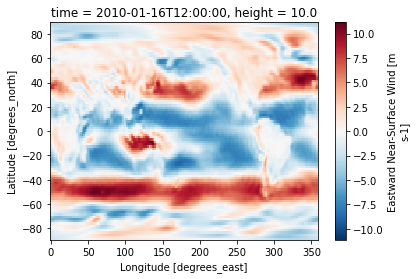

In [22]:
u_step.plot()

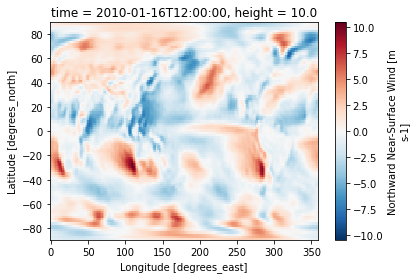

In [23]:
v_step.plot()

In [24]:
speed = np.hypot(u_step, v_step)

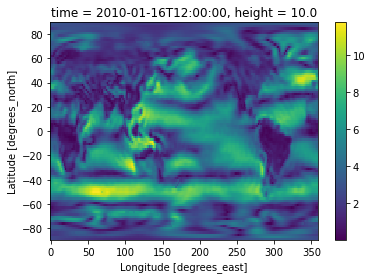

In [25]:
speed.plot()

In [26]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [27]:
lon = speed.lon.data
lat = speed.lat.data
# temp = od.tos[0,:,:].data

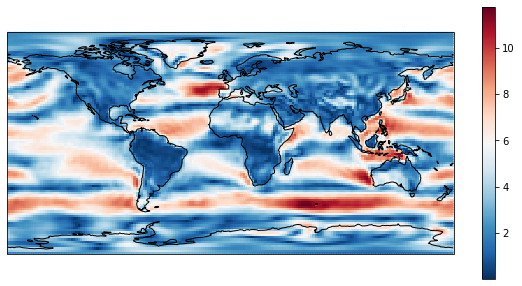

In [28]:
plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='110m', color='k')
img = ax.pcolormesh(lon, lat, 
            speed,  
            cmap=cm.RdBu_r, transform=ccrs.PlateCarree())
plt.colorbar(img)

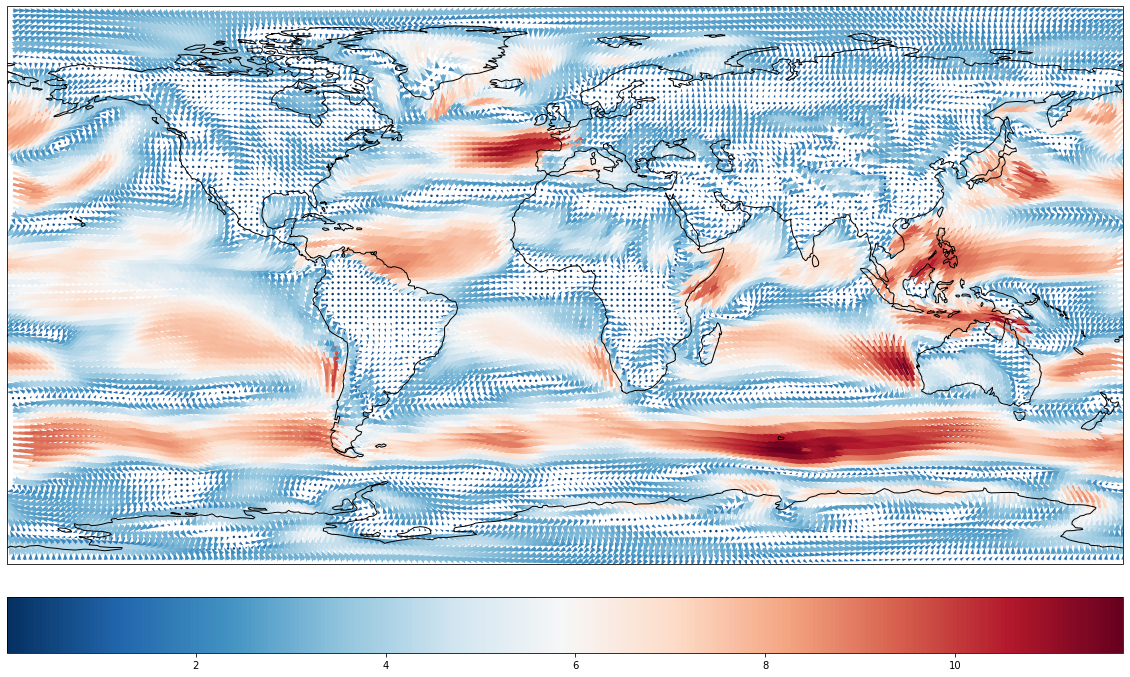

In [29]:
plt.figure(figsize=(20,20))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='110m', color='k')
img = ax.quiver(lon, lat, 
                u_step.data,
                v_step.data,
            speed,  
            cmap=cm.RdBu_r, transform=ccrs.PlateCarree(),
               scale=300,
               )
plt.colorbar(img, orientation='horizontal', pad=0.03)

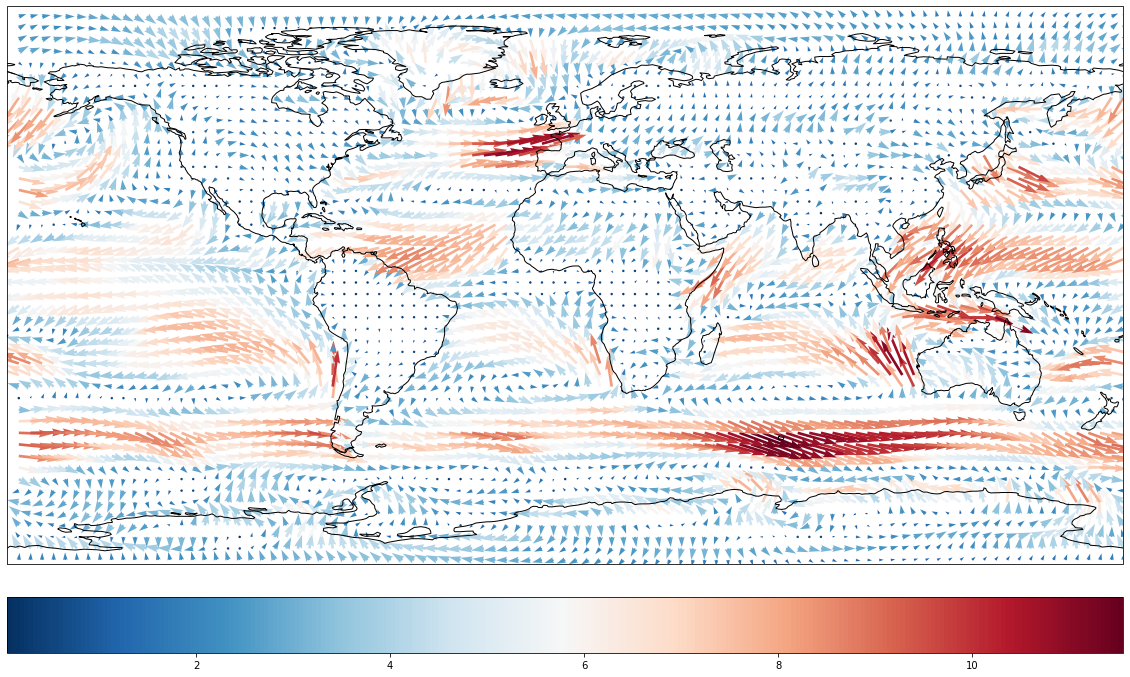

In [30]:
sstep = 2
plt.figure(figsize=(20,20))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='110m', color='k')
img = ax.quiver(lon[::sstep], lat[::sstep], 
                u_step[::sstep,::sstep].data,
                v_step[::sstep,::sstep].data,
            speed[::sstep, ::sstep],  
            cmap=cm.RdBu_r, transform=ccrs.PlateCarree(),
               scale=300,
               )
plt.colorbar(img, orientation='horizontal', pad=0.03)

[More infor on quiver function](https://matplotlib.org/stable/api/_as_gen/matplotlib.quiver.Quiver.html)

## Exersise

- zoom to some interesting region on this map

## Ocean data

In [31]:
od = xr.open_dataset('../data/tos_Omon_MPI-ESM1-2-LR_historical_r1i1p1f1_gn_201001-201412.nc')

In [32]:
od

<xarray.Dataset>
Dimensions:             (bnds: 2, i: 256, j: 220, time: 60, vertices: 4)
Coordinates:
  * time                (time) datetime64[ns] 2010-01-16T12:00:00 ... 2014-12...
  * j                   (j) int32 0 1 2 3 4 5 6 ... 213 214 215 216 217 218 219
  * i                   (i) int32 0 1 2 3 4 5 6 ... 249 250 251 252 253 254 255
    latitude            (j, i) float64 ...
    longitude           (j, i) float64 ...
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds           (time, bnds) datetime64[ns] ...
    vertices_latitude   (j, i, vertices) float64 ...
    vertices_longitude  (j, i, vertices) float64 ...
    tos                 (time, j, i) float32 ...
Attributes:
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    contact:                cmip6-mpi-esm@dkrz.de
    creation_date:          2019-09-04T13:52:13Z
    data_specs_version:     01.00.30
    experiment:             all-forcing simulation of the recent past
    experiment_id:          historical
    external_variables:     areacello
    forcing_index:          1
    frequency:              mon
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.MPI-M.MPI-ES...
    grid:                   gn
    grid_label:             gn
    history:                2019-09-04T13:52:13Z ; CMOR rewrote data to be co...
    initialization_index:   1
    institution:            Max Planck Institute for Meteorology, Hamburg 201...
    institution_id:         MPI-M
    mip_era:                CMIP6
    nominal_resolution:     250 km
    parent_activity_id:     CMIP
    parent_experiment_id:   piControl
    parent_mip_era:         CMIP6
    parent_source_id:       MPI-ESM1-2-LR
    parent_time_units:      days since 1850-1-1 00:00:00
    parent_variant_label:   r1i1p1f1
    physics_index:          1
    product:                model-output
    project_id:             CMIP6
    realization_index:      1
    realm:                  ocean
    references:             MPI-ESM: Mauritsen, T. et al. (2019), Development...
    source:                 MPI-ESM1.2-LR (2017): \naerosol: none, prescribed...
    source_id:              MPI-ESM1-2-LR
    source_type:            AOGCM
    sub_experiment:         none
    sub_experiment_id:      none
    table_id:               Omon
    table_info:             Creation Date:(09 May 2019) MD5:e6ef8ececc8f33864...
    title:                  MPI-ESM1-2-LR output prepared for CMIP6
    variable_id:            tos
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by MPI-M is licensed un...
    cmor_version:           3.5.0
    tracking_id:            hdl:21.14100/b11b872a-7ab3-4ca1-8ec7-1f6936b5f354

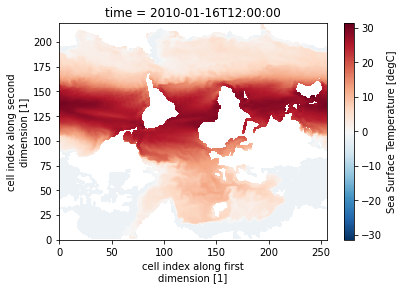

In [33]:
od.tos[0,:,:].plot()

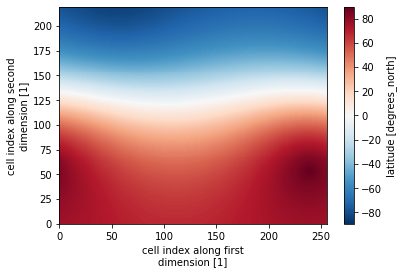

In [34]:
od.latitude.plot()

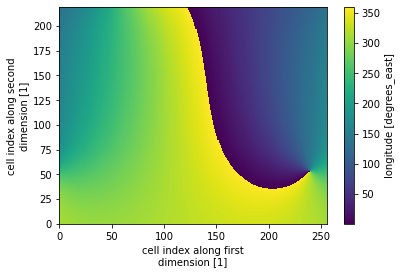

In [35]:
od.longitude.plot()

In [36]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [37]:
lon2d = od.longitude.data
lat2d = od.latitude.data
temp = od.tos[0,:,:].data

In [38]:
lon2d.shape

(220, 256)

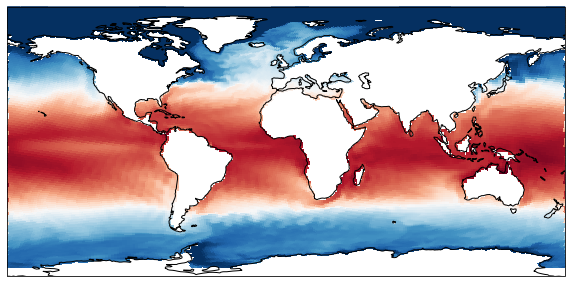

In [39]:
plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='110m', color='k')
ax.pcolormesh(lon2d, lat2d, 
            temp[:-1,:-1],  # this is for matplotlib version >= 3.3
#            temp,  # this is for matplotlib version < 3.3
            cmap=cm.RdBu_r, transform=ccrs.PlateCarree())
# ax.set_extent([-180.,180.,60.,90.], crs=ccrs.PlateCarree())

Another important thing about ocean data, is that they have missing values where the continents are.

In [40]:
temp

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

Let's try to 

In [41]:
areacelo = xr.open_dataset('../data/areacello_Ofx_MPI-ESM1-2-LR_1pctCO2_r1i1p1f1_gn.nc')

In [42]:
areacelo_data = areacelo.areacello.data

In [43]:
areacelo_data

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [44]:
np.sum(temp)

nan

In [45]:
np.sum(areacelo_data)

nan

In [46]:
np.nansum(temp)

368245.03

## Exersise

- compute mean ocean surface temperature

## Writing NetCDF files

You must have:

- dimensions
- variable

You can have:

- coordinate variables
- atributes

In [47]:
Nx, Ny = 50, 60
xmin, xmax, ymin, ymax = -3, 3, 0, 3
x = np.linspace(xmin, xmax, Nx, dtype=np.float32)
y = np.linspace(ymin, ymax, Ny, dtype=np.float32)
x2, y2 = np.meshgrid(x, y)
z = np.sin(x2 ** 2 + y2 ** 2)

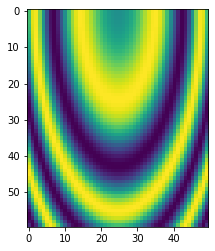

In [219]:
plt.imshow(z)

In [205]:
outnc = xr.Dataset({'height':(['x','y'],z)})
outnc

<xarray.Dataset>
Dimensions:  (x: 60, y: 50)
Dimensions without coordinates: x, y
Data variables:
    height   (x, y) float32 0.41211846 0.91049427 ... -0.9999988 -0.75098723

In [206]:
outnc.to_netcdf('./outnc.nc')

In [207]:
backin = xr.open_dataset('./outnc.nc')
backin

<xarray.Dataset>
Dimensions:  (x: 60, y: 50)
Dimensions without coordinates: x, y
Data variables:
    height   (x, y) float32 ...

In [208]:
backin.close()

In [227]:
outnc = xr.Dataset({'height':(['y','x'],z)},
                  coords={'y':y,
                          'x':x},
                  )
outnc

<xarray.Dataset>
Dimensions:  (x: 50, y: 60)
Coordinates:
  * y        (y) float32 0.0 0.050847456 0.10169491 ... 2.8983052 2.9491525 3.0
  * x        (x) float32 -3.0 -2.877551 -2.7551022 ... 2.7551022 2.877551 3.0
Data variables:
    height   (y, x) float32 0.41211846 0.91049427 ... -0.9999988 -0.75098723

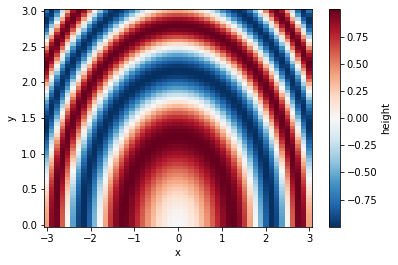

In [228]:
outnc.height.plot()

In [233]:
outnc = xr.Dataset({'height':(['y','x'],z)},
                  coords={'y':y,
                          'x':x},
                attrs=dict(description="My first netCDF file"),
                  )
outnc.height.attrs = {'units':'m'}
outnc.x.attrs = {'units':'km'}
outnc.y.attrs = {'units':'km'}
outnc

<xarray.Dataset>
Dimensions:  (x: 50, y: 60)
Coordinates:
  * y        (y) float32 0.0 0.050847456 0.10169491 ... 2.8983052 2.9491525 3.0
  * x        (x) float32 -3.0 -2.877551 -2.7551022 ... 2.7551022 2.877551 3.0
Data variables:
    height   (y, x) float32 0.41211846 0.91049427 ... -0.9999988 -0.75098723
Attributes:
    description:  My first netCDF file

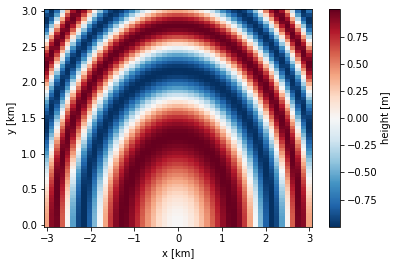

In [234]:
outnc.height.plot()

In [235]:
outnc.to_netcdf('./outnc.nc')

## Exersise:

- Save data only for the northern hemisphere from one of the atmospheric files, by constructing xr.Dataset from the data.
- Solution is below, you can use it as a guide :) Maybe select some other region (Europe)

let's take some region from our atmospheric file:

In [175]:
as_hist

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 96, lon: 192, time: 300)
Coordinates:
    height     float64 2.0
  * lon        (lon) float64 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
  * lat        (lat) float64 -88.57 -86.72 -84.86 -83.0 ... 84.86 86.72 88.57
  * time       (time) datetime64[ns] 1990-01-16T12:00:00 ... 2014-12-16T12:00:00
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(240, 2), meta=np.ndarray>
    lat_bnds   (time, lat, bnds) float64 dask.array<chunksize=(240, 96, 2), meta=np.ndarray>
    lon_bnds   (time, lon, bnds) float64 dask.array<chunksize=(240, 192, 2), meta=np.ndarray>
    tas        (time, lat, lon) float32 dask.array<chunksize=(240, 96, 192), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    contact:                cmip6-mpi-esm@dkrz.de
    creation_date:          2019-09-04T15:26:51Z
    data_specs_version:     01.00.30
    experiment:             all-forcing simulation of the recent past
    experiment_id:          historical
    external_variables:     areacella
    forcing_index:          1
    frequency:              mon
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.MPI-M.MPI-ES...
    grid:                   gn
    grid_label:             gn
    history:                2019-09-04T15:26:51Z ; CMOR rewrote data to be co...
    initialization_index:   1
    institution:            Max Planck Institute for Meteorology, Hamburg 201...
    institution_id:         MPI-M
    mip_era:                CMIP6
    nominal_resolution:     250 km
    parent_activity_id:     CMIP
    parent_experiment_id:   piControl
    parent_mip_era:         CMIP6
    parent_source_id:       MPI-ESM1-2-LR
    parent_time_units:      days since 1850-1-1 00:00:00
    parent_variant_label:   r1i1p1f1
    physics_index:          1
    product:                model-output
    project_id:             CMIP6
    realization_index:      1
    realm:                  atmos
    references:             MPI-ESM: Mauritsen, T. et al. (2019), Development...
    source:                 MPI-ESM1.2-LR (2017): \naerosol: none, prescribed...
    source_id:              MPI-ESM1-2-LR
    source_type:            AOGCM
    sub_experiment:         none
    sub_experiment_id:      none
    table_id:               Amon
    table_info:             Creation Date:(09 May 2019) MD5:e6ef8ececc8f33864...
    title:                  MPI-ESM1-2-LR output prepared for CMIP6
    variable_id:            tas
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by MPI-M is licensed un...
    cmor_version:           3.5.0
    tracking_id:            hdl:21.14100/49df5bf4-b1de-4efd-a8c7-960ebc0ef7e0

Norhtern hemisphere latitudes will be:

In [236]:
as_hist.lat[48:]

<xarray.DataArray 'lat' (lat: 48)>
array([ 0.93263 ,  2.79789 ,  4.66315 ,  6.528409,  8.393669, 10.258928,
       12.124187, 13.989446, 15.854704, 17.719962, 19.585219, 21.450475,
       23.315731, 25.180986, 27.046239, 28.911492, 30.776744, 32.641994,
       34.507243, 36.372491, 38.237736, 40.102979, 41.96822 , 43.833459,
       45.698694, 47.563926, 49.429154, 51.294377, 53.159595, 55.024808,
       56.890013, 58.755209, 60.620396, 62.485571, 64.35073 , 66.215872,
       68.080991, 69.946081, 71.811132, 73.676132, 75.541061, 77.405888,
       79.270559, 81.134977, 82.998942, 84.86197 , 86.722531, 88.572169])
Coordinates:
    height   float64 2.0
  * lat      (lat) float64 0.9326 2.798 4.663 6.528 ... 83.0 84.86 86.72 88.57
Attributes:
    bounds:         lat_bnds
    units:          degrees_north
    axis:           Y
    long_name:      Latitude
    standard_name:  latitude

Select the region

In [237]:
region = as_hist.tas[:,48:,:]

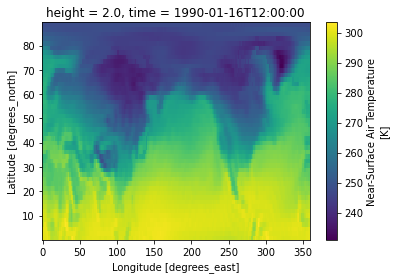

In [238]:
region[0,:,:].plot()

In reality the easiest the easises way is to do:

In [239]:
region.to_netcdf('./cut.nc')

But this is not our way we want it to be painful :)

In [242]:
region_data = region.data.compute()

We have a numpy array with 300 time steps and only half of the latitudes:

In [245]:
region_data.shape

(300, 48, 192)

In [260]:
region_lon = as_hist.lon.data
region_lat = as_hist.lat[48:].data

In [257]:
region_time = as_hist.time

In [258]:
region_ds = xr.Dataset({'region':(['time','lon','lat'],region_data)})
region_ds

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 48, time: 300)
Dimensions without coordinates: lat, lon, time
Data variables:
    region   (time, lon, lat) float32 300.47815 300.62073 ... 248.03004

In [262]:
region_ds = xr.Dataset({'region':(['time','lat','lon'],region_data)},
                      coords={'lon':(['lon'],region_lon),
                              'lat':(['lat'],region_lat),
                              'time':(['time'], region_time)})
region_ds

<xarray.Dataset>
Dimensions:  (lat: 48, lon: 192, time: 300)
Coordinates:
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * lat      (lat) float64 0.9326 2.798 4.663 6.528 ... 83.0 84.86 86.72 88.57
  * time     (time) datetime64[ns] 1990-01-16T12:00:00 ... 2014-12-16T12:00:00
Data variables:
    region   (time, lat, lon) float32 300.47815 300.62073 ... 248.03004

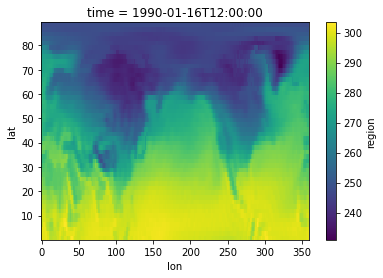

In [264]:
region_ds.region[0,:,:].plot()